# Kntu AI Final project 4021

Import the nessecarry libraries

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

analysis function to evluate the model predictions

In [13]:
def analysis(labels, predictions):
    print("Classification Report: \n", classification_report(labels, predictions, target_names=['positive', 'negative']))
    print("Confusion Matrix: \n", confusion_matrix(labels, predictions))
    print("Accuracy: ", accuracy_score(labels, predictions))

train_knn function gets X(features) and y(labels) then split them for train/test, for knn we iterate over the number of neighbours from 15 to 25 and pick the neighbours count that preforms the best; We store the results in accuracy_scores list and then show the report for the best performing model 

In [14]:
def train_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    accuracy_scores = []
    knns = []
    y_preds=[]
    for neighbours_count in range(15,25):
        knn = KNeighborsClassifier(n_neighbors=neighbours_count)
        knns.append(knn)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        y_preds.append(y_pred)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    plt.plot(list(range(15,25)), accuracy_scores)
    best_index = accuracy_scores.index(max(accuracy_scores))
    analysis(y_test, y_preds[best_index])


train_logistic_regression gets X and y and does train/test splitting then we predict and show the report

In [15]:
def train_logisitic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_preds=[]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    analysis(y_test, y_pred)
    

### Preprocessing the data

In [16]:
df = pd.read_csv("dataset.csv")
df.head()

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",negative
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative
4,Some critics have compared Chop Shop with the ...,positive


In [17]:
df.describe()

,comment,sentiment
count,45000,45000
unique,44664,2
top,"Hilarious, clean, light-hearted, and quote-wor...",positive
freq,4,22501


The data is balanced so we can continue our journey

Using bag of words method to vectorize the comment column

In [18]:
vectorizer = CountVectorizer()
vectorizer.fit(df['comment'])

CountVectorizer()

In [19]:
X = vectorizer.transform(df['comment'])

convert categorical sentiment column to numbers using the label encoder

In [20]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 1, 0, 0])

KNN results

Classification Report: 
               precision    recall  f1-score   support

    positive       0.68      0.63      0.65      5589
    negative       0.66      0.71      0.68      5661

    accuracy                           0.67     11250
   macro avg       0.67      0.67      0.67     11250
weighted avg       0.67      0.67      0.67     11250

Confusion Matrix: 
 [[3518 2071]
 [1657 4004]]
Accuracy:  0.6686222222222222


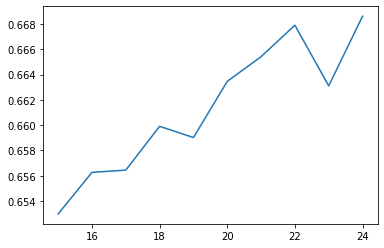

In [21]:
train_knn(X,y)

Logistic Regression results

In [22]:
train_logisitic_regression(X,y)

Classification Report: 
               precision    recall  f1-score   support

    positive       0.89      0.88      0.88      5667
    negative       0.88      0.89      0.88      5583

    accuracy                           0.88     11250
   macro avg       0.88      0.88      0.88     11250
weighted avg       0.88      0.88      0.88     11250

Confusion Matrix: 
 [[4991  676]
 [ 624 4959]]
Accuracy:  0.8844444444444445


d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Define some simple characters to exclude from the comment and then perform bag of words

In [23]:
stopwords = ['.', ',', ';', '"', '\'', '\n', '\r', 'br', '!', '?', '`', '<', '>', '/']

In [24]:
def simple_preprocess_comment(comment):
    comment_tokenized = word_tokenize(comment)
    comment_tokenized_filterd = [w for w in comment_tokenized if w not in stopwords]
    return ' '.join(comment_tokenized_filterd)

In [25]:
df['simple_preprocessed_comment'] = df['comment'].apply(simple_preprocess_comment)

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(df['simple_preprocessed_comment'])

CountVectorizer()

In [27]:
X = vectorizer.transform(df['simple_preprocessed_comment'])

Classification Report: 
               precision    recall  f1-score   support

    positive       0.69      0.62      0.65      5615
    negative       0.66      0.73      0.69      5635

    accuracy                           0.67     11250
   macro avg       0.67      0.67      0.67     11250
weighted avg       0.67      0.67      0.67     11250

Confusion Matrix: 
 [[3462 2153]
 [1529 4106]]
Accuracy:  0.6727111111111111


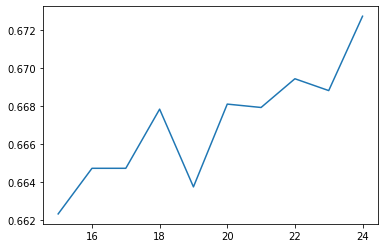

In [28]:
train_knn(X,y)

In [29]:
train_logisitic_regression(X,y)

Classification Report: 
               precision    recall  f1-score   support

    positive       0.88      0.89      0.88      5570
    negative       0.89      0.88      0.88      5680

    accuracy                           0.88     11250
   macro avg       0.88      0.88      0.88     11250
weighted avg       0.88      0.88      0.88     11250

Confusion Matrix: 
 [[4930  640]
 [ 665 5015]]
Accuracy:  0.884


d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we see the results are slightly better

Download the nltk stop works to omitt them from the text

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mehrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Add the nltk stopwords to our exisiting characters to ommit them from comment text

In [31]:
stopwords.extend(nltk.corpus.stopwords.words('english'))
stopwords[:5]

['.', ',', ';', '"', "'"]

We also stem the comment text after filtering out the stopwords for better performance

In [32]:
stemmer = PorterStemmer()
def preprocess_comment(comment):
    comment_tokenized = word_tokenize(comment)
    comment_tokenized_filterd = [w for w in comment_tokenized if w not in stopwords]
    comment_tokenized_filterd_stemmed = [stemmer.stem(w) for w in comment_tokenized_filterd]
    return ' '.join(comment_tokenized_filterd_stemmed)

In [33]:
df['comment_tokenized_filterd_stemmed'] = df['comment'].apply(preprocess_comment)
df.head()

,comment,sentiment,simple_preprocessed_comment,comment_tokenized_filterd_stemmed
0,"Oh my god, it just doesn't get any worse than ...",negative,Oh my god it just does n't get any worse than ...,oh god n't get wors i alway love silli littl s...
1,If you're a layman interested in quantum theor...,negative,If you 're a layman interested in quantum theo...,if 're layman interest quantum theori string t...
2,It's amazing that this no talent actor Chapa g...,negative,It 's amazing that this no talent actor Chapa ...,it 's amaz talent actor chapa got well known s...
3,This must be one of the most overrated Spanish...,negative,This must be one of the most overrated Spanish...,thi must one overr spanish film histori it lac...
4,Some critics have compared Chop Shop with the ...,positive,Some critics have compared Chop Shop with the ...,some critic compar chop shop theatric releas c...


In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(df['comment_tokenized_filterd_stemmed'])

CountVectorizer()

In [35]:
X = vectorizer.transform(df['comment_tokenized_filterd_stemmed'])

In [36]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 1, 0, 0])

Classification Report: 
               precision    recall  f1-score   support

    positive       0.68      0.69      0.69      5586
    negative       0.69      0.68      0.69      5664

    accuracy                           0.69     11250
   macro avg       0.69      0.69      0.69     11250
weighted avg       0.69      0.69      0.69     11250

Confusion Matrix: 
 [[3854 1732]
 [1798 3866]]
Accuracy:  0.6862222222222222


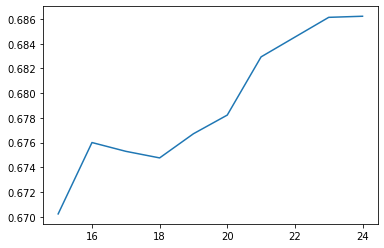

In [37]:
train_knn(X, y)

In [38]:
train_logisitic_regression(X,y)

Classification Report: 
               precision    recall  f1-score   support

    positive       0.88      0.87      0.88      5549
    negative       0.88      0.88      0.88      5701

    accuracy                           0.88     11250
   macro avg       0.88      0.88      0.88     11250
weighted avg       0.88      0.88      0.88     11250

Confusion Matrix: 
 [[4844  705]
 [ 665 5036]]
Accuracy:  0.8782222222222222


d:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see the results are further improved